# Import Libraries

In [ ]:
#General
import numpy as np
import pandas as pd
import itertools

# System
import os, fnmatch
import time

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display
from sklearn.metrics import RocCurveDisplay

# Machine Learning
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from imblearn.pipeline import Pipeline as imbPipeline
!pip install -q category_encoders
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

# Random Seed
from numpy.random import seed
seed(1)

# Audio
import librosa.display, librosa

     |████████████████████████████████| 69 kB 4.8 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Root Directory of project
root = "/content/drive/MyDrive/ML_Final_Project"

# Load Data

In [ ]:
features = pd.read_csv(f'{root}/Features/MFCC.csv', index_col=0)
features

,voice_id,emotion_id,text_id,gender,age,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15997,1,1,1,21,-273.89975,109.914710,-27.178843,24.050000,-30.668251,7.612669,-32.395473,-14.576503,10.577414,-4.430114,-14.836465,4.711704,7.049230
1,16001,1,2,1,21,-262.88242,109.629010,-13.443775,18.656229,-17.951504,9.419722,-28.762785,-16.300575,2.878427,-3.965334,-5.139730,-1.002245,4.031993
2,16005,1,3,1,21,-326.58148,60.505104,-21.587154,48.611760,-4.395157,16.118166,-30.941092,8.018489,5.544771,-5.991427,-6.399820,-3.664392,-2.098389
3,16009,1,4,1,21,-306.34730,74.334130,-5.936096,26.786450,-17.253584,4.249269,-25.107138,-2.077201,-10.063375,-13.074363,-1.516927,-0.688974,3.916486
4,16013,1,5,1,21,-272.34177,101.913376,-17.402200,17.161690,-32.563335,-1.015059,-37.220806,-5.984633,3.240388,-5.720155,-6.592540,-7.537375,9.101556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,10563,4,6,0,54,-312.99890,83.493286,19.964092,-2.189093,-8.052568,8.817256,0.923595,2.250675,-4.261540,-3.527034,-4.379839,-2.800457,-2.772394
16436,10567,4,7,0,54,-293.31683,87.924740,19.781424,20.599514,-5.998958,-0.776978,-6.013906,-4.710018,-4.548595,-6.986614,-11.384063,-4.966642,-0.050604
16437,10571,4,8,0,54,-401.16852,85.599630,8.782131,15.285742,2.952115,-5.438883,-4.962066,-7.098472,-5.790778,2.221919,-8.279410,-4.310554,0.981393
16438,10575,4,9,0,54,-389.98862,71.494570,19.549135,20.339664,-8.362865,-8.162744,1.794381,-4.132726,-10.336851,-5.961664,-5.687753,-1.245518,-2.261302


# Training Preperation

## Transform text id to object type because it's a categorical variable

In [ ]:
features['text_id'] = features['text_id'].astype(object)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16440 entries, 0 to 16439
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   voice_id    16440 non-null  int64  
 1   emotion_id  16440 non-null  int64  
 2   text_id     16440 non-null  object 
 3   gender      16440 non-null  int64  
 4   age         16440 non-null  int64  
 5   0           16440 non-null  float64
 6   1           16440 non-null  float64
 7   2           16440 non-null  float64
 8   3           16440 non-null  float64
 9   4           16440 non-null  float64
 10  5           16440 non-null  float64
 11  6           16440 non-null  float64
 12  7           16440 non-null  float64
 13  8           16440 non-null  float64
 14  9           16440 non-null  float64
 15  10          16440 non-null  float64
 16  11          16440 non-null  float64
 17  12          16440 non-null  float64
dtypes: float64(13), int64(4), object(1)
memory usage: 2.4+ MB


## drop 1st 40 items (unique person voice in test data)

In [ ]:
unique_test_voice = features.head(40)
unique_test_voice

,voice_id,emotion_id,text_id,gender,age,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15997,1,1,1,21,-273.89975,109.914710,-27.178843,24.050000,-30.668251,7.612669,-32.395473,-14.576503,10.577414,-4.430114,-14.836465,4.711704,7.049230
1,16001,1,2,1,21,-262.88242,109.629010,-13.443775,18.656229,-17.951504,9.419722,-28.762785,-16.300575,2.878427,-3.965334,-5.139730,-1.002245,4.031993
2,16005,1,3,1,21,-326.58148,60.505104,-21.587154,48.611760,-4.395157,16.118166,-30.941092,8.018489,5.544771,-5.991427,-6.399820,-3.664392,-2.098389
3,16009,1,4,1,21,-306.34730,74.334130,-5.936096,26.786450,-17.253584,4.249269,-25.107138,-2.077201,-10.063375,-13.074363,-1.516927,-0.688974,3.916486
4,16013,1,5,1,21,-272.34177,101.913376,-17.402200,17.161690,-32.563335,-1.015059,-37.220806,-5.984633,3.240388,-5.720155,-6.592540,-7.537375,9.101556
5,16017,1,6,1,21,-289.53345,105.549190,-12.739730,20.391268,-57.518955,15.571481,-27.068680,-2.166059,13.517084,-8.963300,-7.888508,-3.539140,9.381444
6,16021,1,7,1,21,-278.27673,113.293980,-15.276953,22.352810,-19.572474,9.489069,-32.159996,-18.460640,-1.904794,-3.578822,-10.354978,-4.061266,14.474488
7,16025,1,8,1,21,-218.41924,122.771970,-24.408714,27.803457,-44.983050,21.362942,-29.586584,-33.623720,7.367897,1.642842,-21.954027,-2.374858,0.201560
8,16029,1,9,1,21,-269.79633,97.518970,-25.402277,31.440712,-29.173807,15.623188,-33.117844,-25.055447,12.487694,-3.332375,-10.359667,-3.716448,0.428415
9,15993,1,10,1,21,-350.87490,57.504830,-17.232000,28.595894,-27.996094,9.096926,-27.858890,-7.624134,6.552177,-10.231030,-10.887756,-2.872697,0.433243


In [ ]:
features = features.iloc[40: , :]
features

,voice_id,emotion_id,text_id,gender,age,0,1,2,3,4,5,6,7,8,9,10,11,12
40,16037,1,1,1,24,-438.52173,61.628895,6.458550,18.226023,-2.901841,3.191789,2.579127,1.564625,-0.153300,2.582326,-3.926799,-0.187903,-0.110364
41,16041,1,2,1,24,-401.73190,73.792350,2.401362,22.416000,3.872907,5.579543,1.316489,-5.494547,-6.447129,3.572569,-5.365022,-1.385602,-1.872482
42,16045,1,3,1,24,-458.63058,57.280130,9.020956,40.212410,15.871551,10.321451,-3.329384,0.472639,-1.762260,-0.138106,-7.621304,-0.596439,-1.374018
43,16049,1,4,1,24,-368.35934,76.913270,1.693754,35.798027,4.536078,11.802741,0.065751,-0.496058,-5.906494,4.978903,-7.369457,-2.462245,-4.774655
44,16053,1,5,1,24,-419.05167,85.713005,5.156343,29.744568,-8.485403,12.235342,5.339817,-4.072935,-6.409697,5.517149,-6.231317,1.854781,-1.474196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16435,10563,4,6,0,54,-312.99890,83.493286,19.964092,-2.189093,-8.052568,8.817256,0.923595,2.250675,-4.261540,-3.527034,-4.379839,-2.800457,-2.772394
16436,10567,4,7,0,54,-293.31683,87.924740,19.781424,20.599514,-5.998958,-0.776978,-6.013906,-4.710018,-4.548595,-6.986614,-11.384063,-4.966642,-0.050604
16437,10571,4,8,0,54,-401.16852,85.599630,8.782131,15.285742,2.952115,-5.438883,-4.962066,-7.098472,-5.790778,2.221919,-8.279410,-4.310554,0.981393
16438,10575,4,9,0,54,-389.98862,71.494570,19.549135,20.339664,-8.362865,-8.162744,1.794381,-4.132726,-10.336851,-5.961664,-5.687753,-1.245518,-2.261302


## split data to male and female due to equal train/test split

In [ ]:
male_data = features[features['gender'] == 1]
female_data = features[features['gender'] == 0]

In [ ]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    male_data.drop(['voice_id', 'gender', 'text_id'], 1),
    male_data['gender'],
    test_size=0.33, random_state=42,
    stratify=male_data['gender'])

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    female_data.drop(['voice_id', 'gender', 'text_id'], 1),
    female_data['gender'],
    test_size=0.33, random_state=42,
    stratify=female_data['gender'])

X_train = pd.concat([X_train_m, X_train_f])
X_test = pd.concat([X_test_m , X_test_f, unique_test_voice.drop(['voice_id', 'gender', 'text_id'], 1)])
y_train = pd.concat([y_train_m , y_train_f])
y_test = pd.concat([y_test_m , y_test_f, unique_test_voice['gender']])
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,emotion_id,age,0,1,2,3,4,5,6,7,8,9,10,11,12
7169,4,24,-481.79840,44.814747,19.703438,4.624812,-3.078829,-0.238355,5.161793,-2.285054,-10.459847,3.778392,-3.667521,-4.280706,-5.217744
10986,3,20,-378.09530,71.827590,-18.936330,24.554256,0.586462,8.889851,8.951528,-11.209567,-12.846706,1.869834,0.614904,-9.014245,-4.189248
13028,1,58,-403.27520,83.407520,-15.172684,-1.662678,-28.991480,6.774685,-7.919548,3.876396,-4.901815,-6.484235,3.072559,-6.437250,-10.038855
12087,4,24,-247.41365,128.594000,8.492085,14.859013,39.912457,15.368606,5.716129,-8.981185,-13.517997,7.722197,4.926775,2.276521,-9.975309
5439,1,30,-381.62890,102.604830,11.098138,24.330025,11.242306,9.504813,11.686911,0.562819,-13.221281,4.409813,-2.293802,-5.416557,-5.865225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,1,35,-294.21347,124.436610,-10.654675,30.085491,1.945342,14.503659,-22.579733,-13.978076,-4.054181,-18.151203,-10.367010,-8.397475,-10.464478
9917,1,26,-415.44873,70.906920,6.442076,-2.836787,-0.259570,8.798420,-9.981774,3.564412,0.539250,-0.668643,-1.890473,-3.801018,-7.692169
5735,4,55,-392.29270,73.122300,19.537357,23.306217,21.739536,22.874804,-7.604178,11.926647,8.230162,0.659323,-3.789274,0.858044,-4.876941
2206,3,26,-291.37405,140.256380,24.125860,0.735017,30.501144,1.999000,-1.855549,6.569278,-12.329513,2.447261,-5.160216,6.210566,-3.828644


In [ ]:
y_train

7169     1
10986    1
13028    1
12087    1
5439     1
        ..
6458     0
9917     0
5735     0
2206     0
7539     0
Name: gender, Length: 10987, dtype: int64

## Standardize Columns

In [ ]:
num_cols = ['age', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

cat_cols = list(X_train.select_dtypes(include='object').columns)

all_cols = cat_cols + num_cols

In [ ]:
# ohe_pipe = imbPipeline([('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
num_pipe = imbPipeline([
    ('ss', StandardScaler())
])

transformer = ColumnTransformer([
    ('number', num_pipe, num_cols),
])

X_train = transformer.fit_transform(X_train, y_train)

X_test = transformer.fit_transform(X_test, y_test)


# Function for evaluating models

In [ ]:
class Evaluation :
    
    def __init__(self,X_train,X_test,y_train,y_test):
        self.X_train=X_train
        self.X_test=X_test
        self.y_train=y_train
        self.y_test=y_test
        
    def evaluate(self,predicted_labels):
        
        print("Number of samples:",self.y_test.shape[0])
        
        print("classes : Female, Male")

        # Recall - the ability of the classifier to find all the positive samples
        print("Recall: ", recall_score(self.y_test, predicted_labels,average=None))

        # Precision - The precision is intuitively the ability of the classifier not to 
        #label as positive a sample that is negative
        print("Precision: ", precision_score(self.y_test, predicted_labels,average=None))

        # F1-Score - The F1 score can be interpreted as a weighted average of the precision 
        #and recall
        print("F1-Score: ", f1_score(self.y_test, predicted_labels, average=None))

        # Accuracy - the number of correctly classified samples
        print("Accuracy: %.2f  ," % accuracy_score(self.y_test, predicted_labels ))
       

    def cnf_matrix(self,predicted_labels):
        cnf_matrix = confusion_matrix(self.y_test, predicted_labels)
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        plt.figure(figsize=(12,9))
        self.plot_confusion_matrix(cnf_matrix, classes=['Female','Male'],
                              title='Confusion matrix, without normalization')

    # Function to Plot Confusion Matrix
    # http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    def plot_confusion_matrix(self,cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')
        """
        #print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [ ]:
ev=Evaluation(X_train,X_test,y_train,y_test)

# Classification using MFCC

## KNN Classification With HalvingGridSearch to Find Best Parameters

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = { 
     "n_neighbors": [3,5,7,9,11,15,20,25,30, 40, 50], 
      "metric": ['euclidean','manhattan','minkowski']    }

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scores = ["accuracy"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = HalvingGridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring="%s" % score,cv=5,verbose=1)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 406
max_resources_: 10987
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 33
n_resources: 406
Fitting 5 folds for each of 33 candidates, totalling 165 fits
----------
iter: 1
n_candidates: 11
n_resources: 1218
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 2
n_candidates: 4
n_resources: 3654
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 10962
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters set found on development set:

{'metric': 'manhattan', 'n_neighbors': 9}

Grid scores on development set:

0.679 (+/-0.031) for {'metric': 'euclidean', 'n_neighbors': 3}
0.669 (+/-0.069) for {'metric': 'euclidean', 'n_neighbors': 5}
0.679 (+/-0.094) for {'metric': 'euclidean', 'n_neighbors': 7}
0.686 (+/-0.058) for {'metric': 'euclidean'

In [ ]:
# KNN Classifier
model = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'],metric=clf.best_params_['metric'])
model.fit(X_train, y_train);
# Predict using the Test Set
predicted_labels = model.predict(X_test)

In [ ]:
ev.evaluate(predicted_labels)

Number of samples: 5453
classes : Female, Male
Recall:  [0.82185456 0.89243167]
Precision:  [0.87433483 0.8461794 ]
F1-Score:  [0.84728282 0.86869031]
Accuracy: 0.86  ,


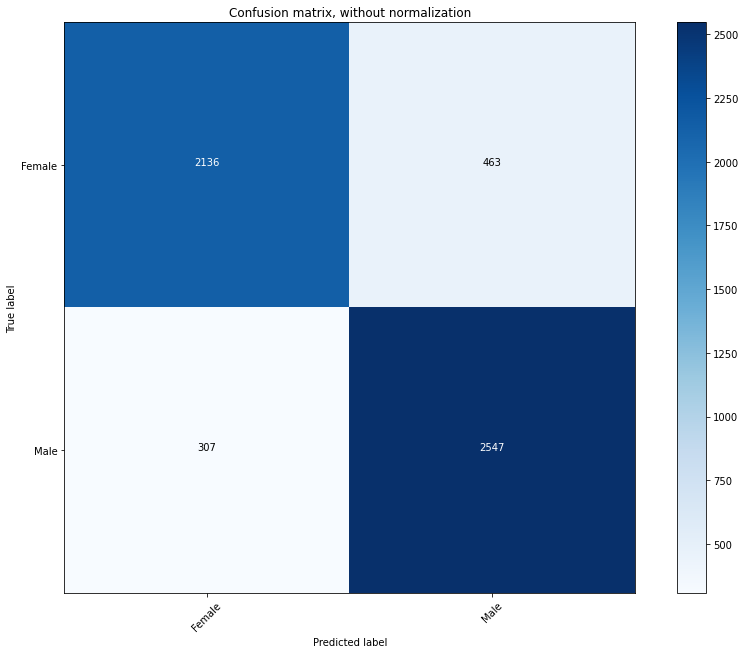

In [ ]:
ev.cnf_matrix(predicted_labels)

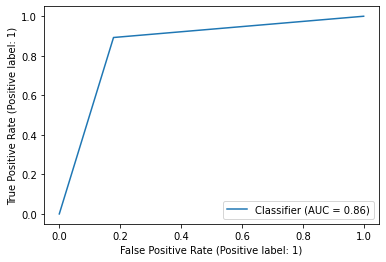

In [ ]:
RocCurveDisplay.from_predictions(y_test, predicted_labels)

## MLP Classification With HalvingGridSearch to Find Best Parameters

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = {
     'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
scores = ["accuracy"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = HalvingGridSearchCV(MLPClassifier(max_iter=3000), tuned_parameters, scoring="%s" % score,cv=2 ,verbose=1)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 1220
max_resources_: 10987
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 1220
Fitting 2 folds for each of 16 candidates, totalling 32 fits
----------
iter: 1
n_candidates: 6
n_resources: 3660
Fitting 2 folds for each of 6 candidates, totalling 12 fits
----------
iter: 2
n_candidates: 2
n_resources: 10980
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters set found on development set:

{'activation': 'relu', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'adam'}

Grid scores on development set:

0.727 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'sgd'}
0.758 (+/-0.018) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}
0.725 (+/-0.051) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'adaptive',

In [ ]:
model = MLPClassifier(random_state=1,
                        activation=clf.best_params_['activation'],
                        solver=clf.best_params_['solver'],
                        alpha=clf.best_params_['alpha'],
                        learning_rate=clf.best_params_['learning_rate'])
model.fit(X_train, y_train);
# Predict using the Test Set
predicted_labels = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
ev.evaluate(predicted_labels)

Number of samples: 5453
classes : Female, Male
Recall:  [0.84 0.85]
Precision:  [0.83 0.86]
F1-Score:  [0.84 0.85]
Accuracy: 0.84  ,


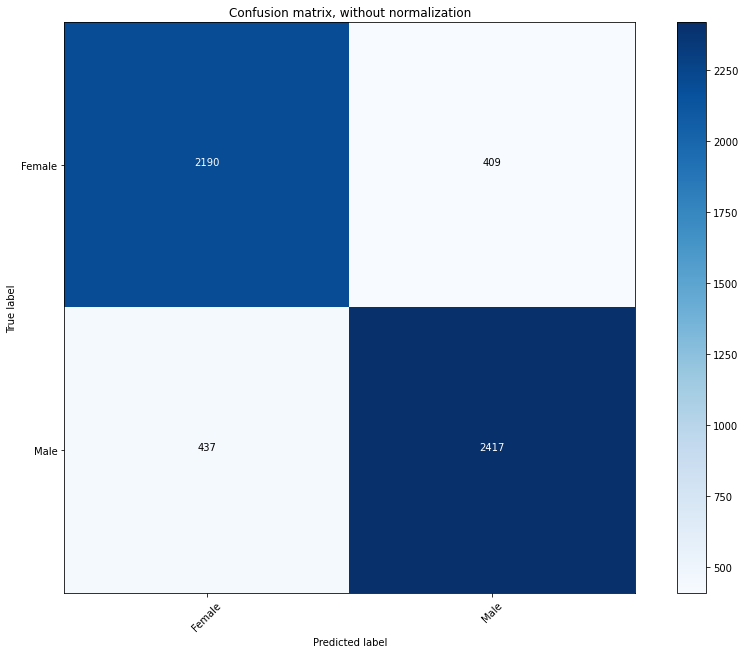

In [ ]:
ev.cnf_matrix(predicted_labels)

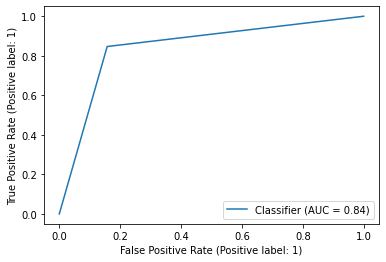

In [ ]:
RocCurveDisplay.from_predictions(y_test, predicted_labels)

## SVM Classification With HalvingGridSearch to Find Best Parameters

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [
  {'C': [0.5, 1, 10, 100], 'gamma':['scale','auto', 0.1, 0.5,0.9], 'kernel': ['rbf']},
  {'C': [1, 10, 100], 'kernel': ['linear']},
]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scores = ["accuracy"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = HalvingGridSearchCV(SVC(), tuned_parameters, scoring="%s" % score,cv=2,verbose=2)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 1220
max_resources_: 10987
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 23
n_resources: 1220
Fitting 2 folds for each of 23 candidates, totalling 46 fits
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.5, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.5, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.5, gamma=0.9

In [ ]:
if clf.best_params_['kernel'] == 'linear':
  model = SVC(C=clf.best_params_['C'], kernel=clf.best_params_['kernel'])
elif clf.best_params_['kernel'] == 'poly':
  model = SVC(gamma=clf.best_params_['gamma'], kernel=clf.best_params_['kernel'], C=clf.best_params_['C'])
else:
  model = SVC(C=clf.best_params_['C'], gamma=clf.best_params_['gamma'], kernel=clf.best_params_['kernel'])
model.fit(X_train, y_train)
# Predict using the Test Set
predicted_labels = model.predict(X_test)

In [ ]:
ev.evaluate(predicted_labels)

Number of samples: 5453
classes : Female, Male
Recall:  [0.85109658 0.86019622]
Precision:  [0.84718499 0.86382829]
F1-Score:  [0.84913628 0.86200843]
Accuracy: 0.86  ,


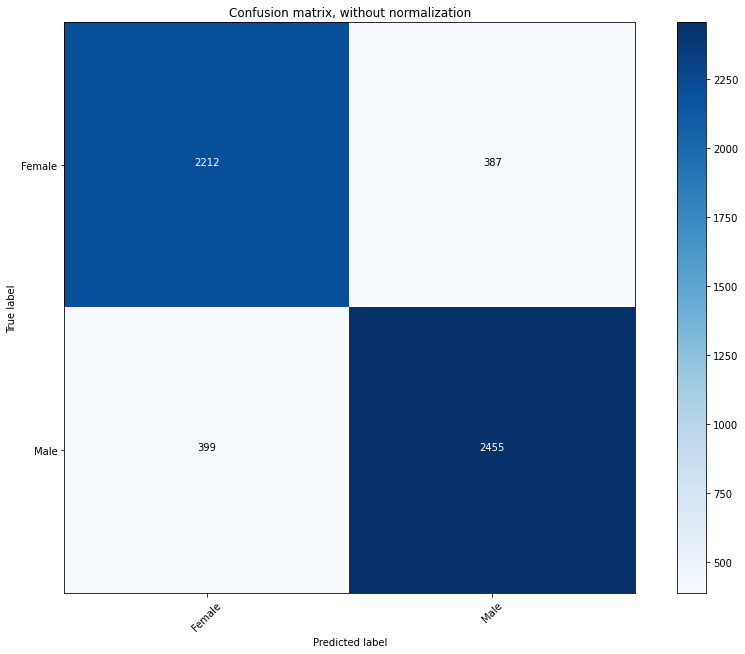

In [ ]:
ev.cnf_matrix(predicted_labels)

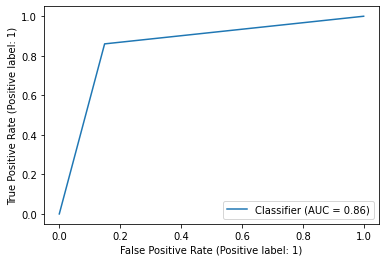

In [ ]:

RocCurveDisplay.from_predictions(y_test, predicted_labels)